### Dataset info: 

The dataset is related to Portuguese "Vinho Verde" wines. For more info:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

File sources:
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv    
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv


Import packages and modules. Get dataset source and merge the two separate dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
white_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'    
red_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

white_wine = pd.read_csv(white_url, sep=';')
red_wine = pd.read_csv(red_url, sep=';')

white_wine['wine_type'] = 'white'
red_wine['wine_type'] = 'red'

wine_data_all = pd.concat([white_wine, red_wine], ignore_index=True)
wine_data_all.to_csv('wine_data_all.csv', index=False)

print(wine_data_all.head(), wine_data_all.tail()) 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0            7.0              0.27         0.36            20.7      0.045  \
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                 45.0                 170.0   1.0010  3.00       0.45  \
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality wine_type  
0      8.8        6     white  
1      9.5        6   

Checking for attributes data type

In [3]:
data_types = wine_data_all.dtypes
print(data_types)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object


Searching for missing values and printing the total if there are any.

In [4]:
missing_data_column = wine_data_all.isnull().sum()

total_missing_data = wine_data_all.isnull().sum().sum()

print("Total number of missing data in each column:")
print(missing_data_column)

print("Total number of missing data in the entire DataFrame:", total_missing_data)

Total number of missing data in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64
Total number of missing data in the entire DataFrame: 0


Finding the correlation between the attributes. Quality column was dropped prior to the correlation calculation as it is a categorical variable and will be used as the target variable in the modeling process.

In [5]:
quality_col = 'quality'

new_df = wine_data_all.drop(columns=quality_col) 
non_numeric_cols = new_df.select_dtypes(include=['object']).columns
new_df = new_df.drop(columns=non_numeric_cols)

corr_matrix = new_df.corr()

print("Correlation matrix (excluding '{}' column):".format(quality_col))
print(corr_matrix)

Correlation matrix (excluding 'quality' column):
                      fixed acidity  volatile acidity  citric acid   
fixed acidity              1.000000          0.219008     0.324436  \
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   

                      residual sugar  chlorides  free sulfur dioxide   
fixed acidity              -0.111981  

Plotting the frequency distribution of wine quality using the Quality attribute. 

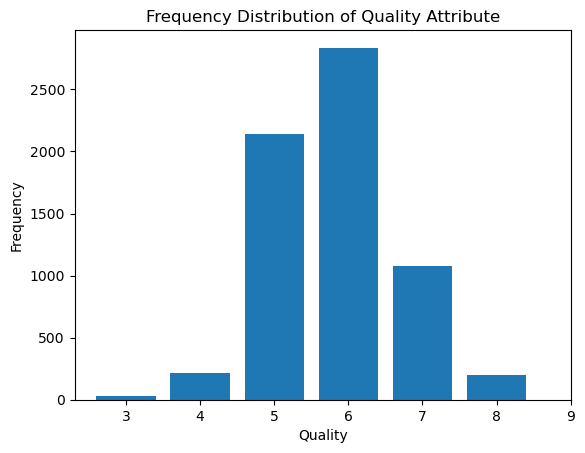

In [6]:
plt.hist(wine_data_all['quality'], bins=range(3, 10), align='left', rwidth=0.8)
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Quality Attribute')
plt.xticks(range(3, 10))
plt.show()

Reducing the levels of rating for quality to two levels, Pass and Fail. Levels 3, 4, and 5 are ssigned to level Fail; and 6, 7, 8, and 9 to level Pass.

In [7]:
def map_quality(quality):
    if quality in [3, 4, 5]:
        return 'Fail'
    elif quality in [6, 7, 8, 9]:
        return 'Pass'
    else:
        return 'Invalid'

wine_data_all['quality'] = wine_data_all['quality'].apply(map_quality).dropna()

print(wine_data_all['quality']) 

0       Pass
1       Pass
2       Pass
3       Pass
4       Pass
        ... 
6492    Fail
6493    Pass
6494    Pass
6495    Fail
6496    Pass
Name: quality, Length: 6497, dtype: object


Normalizing the numeric attributes. Categorical attributes 'quality' and 'wine_type' were separated and dropped from the dataset first to avoid getting error during the normalization. Both will be later on added/copied back to the dataset after the normalization process.

In [8]:
num_attr = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

#separating quality and wine_type attribute
quality_col = wine_data_all['quality']
wine_type_col = wine_data_all['wine_type']

#dropping the quality and wine_type attribute from the dataset
wine_data_all.drop(columns=['quality', 'wine_type'], inplace=True)

#normalizing the rest of the numerical attribute
min_val = wine_data_all[num_attr].min()
max_val = wine_data_all[num_attr].max()

normalized_attr = (wine_data_all[num_attr] - min_val) / (max_val - min_val)

wine_data_all[num_attr] = normalized_attr

#adding back quality and wine_type attribute to the dataset
wine_data_all['quality'] = quality_col
wine_data_all['wine_type'] = wine_type_col


print(wine_data_all.head())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0       0.264463          0.126667     0.216867        0.308282   0.059801  \
1       0.206612          0.146667     0.204819        0.015337   0.066445   
2       0.355372          0.133333     0.240964        0.096626   0.068106   
3       0.280992          0.100000     0.192771        0.121166   0.081395   
4       0.280992          0.100000     0.192771        0.121166   0.081395   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates   
0             0.152778              0.377880  0.267785  0.217054   0.129213  \
1             0.045139              0.290323  0.132832  0.449612   0.151685   
2             0.100694              0.209677  0.154039  0.418605   0.123596   
3             0.159722              0.414747  0.163678  0.364341   0.101124   
4             0.159722              0.414747  0.163678  0.364341   0.101124   

    alcohol quality wine_type  
0  0.115942    Pass     

Preparing and dividing the dataset to training and test sets.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


wine_data_copy = wine_data_all.copy()

X = wine_data_copy.drop(columns=['quality'])
y = wine_data_copy['quality']


X_encoded = pd.get_dummies(X, columns=['wine_type'])

imputer = SimpleImputer(strategy='mean')
X_encoded_imputed = imputer.fit_transform(X_encoded)

print("Number of NaN values in X_encoded_imputed:", np.isnan(X_encoded_imputed).sum())

X_train, X_test, y_train, y_test = train_test_split(X_encoded_imputed, y, test_size=0.7, random_state=1)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Number of NaN values in X_encoded_imputed: 0
X_train shape: (1949, 13)
X_test shape: (4548, 13)
y_train shape: (1949,)
y_test shape: (4548,)


Using Logistic Regression algorithm to predict the quality of wine using its attributes.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

y_train = y_train.map({'Fail': 0, 'Pass': 1})
y_test = y_test.map({'Fail': 0, 'Pass': 1})

logreg_model = LogisticRegression()

logreg_model.fit(X_train, y_train.ravel())

y_pred_logreg = logreg_model.predict(X_test)



Using KNN algorithm to predict the quality of wine using its attributes. 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

k = 5  
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)


Displaying confusion matrices to evaluate the performances of Logistic Regression and KNN. 

In [13]:
from sklearn.metrics import confusion_matrix

#Confusion matrix for Logistic Regression
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix_logreg)

#Confusion matrix for KNN
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix for KNN:")
print(confusion_matrix_knn)

Confusion Matrix for Logistic Regression:
[[ 826  842]
 [ 330 2550]]

Confusion Matrix for KNN:
[[ 925  743]
 [ 518 2362]]


Evaluating the models’ performances by computing Accuracy, Precision, and Recall. 

In [14]:
# Classification report for Logistic Regression
classification_report_logreg = classification_report(y_test, y_pred_logreg)
print("Classification Report for Logistic Regression:")
print(classification_report_logreg)

# Classification report for KNN
classification_report_knn = classification_report(y_test, y_pred_knn)
print("\nClassification Report for KNN:")
print(classification_report_knn)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.71      0.50      0.58      1668
           1       0.75      0.89      0.81      2880

    accuracy                           0.74      4548
   macro avg       0.73      0.69      0.70      4548
weighted avg       0.74      0.74      0.73      4548


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.64      0.55      0.59      1668
           1       0.76      0.82      0.79      2880

    accuracy                           0.72      4548
   macro avg       0.70      0.69      0.69      4548
weighted avg       0.72      0.72      0.72      4548



##### For Logistic Regression model for class 0, the Presion is 0.71 and the Recall is 0.50. For class 1, the Precision is 0.58 and the Recall is 0.89. The Accuracy for this model is 0.74 or 74%. This means that about 74% of the test set were correctly predicted.

##### For KNN model, for class 0, the Presion is 0.64 and the Recall is 0.55. For class 1, the Precision is 0.76 and the Recall is 0.82. The Accuracy for this model is 0.72 or 72%. This means that about 72% of the test set were correctly predicted.

##### Both models'class 1 Precion and Recall are higher, this means that the models are better at correctly predicting and identifying the 'Pass' class. Overall, the Logistic Regression model performed slightly better than KNN model for Precision, Recall, F1 score.

This was one of the assignments given in my course CMTH642 in Toronto Metropolitan University. The mechanics, instructions, questions, and sourcing of dataset in this assignment were prepared by Dr. Ceni Babaoglu of the Toronto Metropolitan University - The Chang School. 

Data Preprocessing and Modeling/Algorithm were generated by myself.